Data Loading: Inside the function, it loads a CSV file specified by input_filename into a pandas DataFrame. The data is assumed to be delimited by semicolons and decimal numbers are represented with commas.

Time Conversion: The 'Time (s)' column, which presumably represents timestamps in seconds, is converted to nanoseconds by multiplying by 1e9.

Column Renaming: The function then renames the columns to a standardized format: 'Time (s)' to 'timestamps', and the next three columns to 'x', 'y', and 'z', respectively.

Adding New Columns: It adds two new columns: 'sensor_type' and 'device_type'. The 'sensor_type' column is filled with the sensor_type argument passed to the function, and 'device_type' is filled with 'smartphone'.

Reordering Columns: The columns are reordered to match the desired format: ['sensor_type', 'device_type', 'timestamps', 'x', 'y', 'z'].

Saving the Transformed Data: The transformed DataFrame is saved to a new CSV file specified by output_filename.

File Conversion: Finally, the script calls the convert_file function for each sensor data file ('Accelerometer.csv', 'Linear Acceleration.csv', 'Magnetometer.csv'), specifying the corresponding output filename and sensor type

In [2]:
import pandas as pd

def convert_file(input_filename, output_filename, sensor_type):
    # Load your data
    df = pd.read_csv('./datasets/group47/data2/' + input_filename, delimiter=';', decimal=',')
    df['Time (s)'] = df['Time (s)'].astype(float) * 1e9  # Convert seconds to nanoseconds

    # Rename columns
    df = df.rename(columns={
        'Time (s)': 'timestamps',
        df.columns[1]: 'x',
        df.columns[2]: 'y',
        df.columns[3]: 'z'
    })

    # Add sensor_type and device_type columns
    df['sensor_type'] = sensor_type
    df['device_type'] = 'smartphone'

    # Reorder columns to match the desired format
    df = df[['sensor_type', 'device_type', 'timestamps', 'x', 'y', 'z']]

    # Save the DataFrame to a new CSV file
    df.to_csv('./datasets/group47/dataset/' + output_filename, index=False)

# Convert each file
convert_file('Accelerometer.csv', 'accelerometer_phone.csv', 'accelerometer')
convert_file('Linear Acceleration.csv', 'linear_acceleration_phone.csv', 'linear_acceleration')
convert_file('Magnetometer.csv', 'magnetometer_phone.csv', 'magnetometer')


In [10]:
dfch2 = pd.read_csv('./datasets/group47/dataset/intermediate_datafiles/chapter2_group47_result.csv', delimiter=',', decimal='.')

# remove nan values
# dfch2 = dfch2.dropna()

# describe
print(dfch2.describe())

# check nan values
dfch2.isnull().sum()

       acc_phone_x  acc_phone_y  acc_phone_z  lin_acc_phone_x  \
count  7241.000000  7241.000000  7241.000000      7240.000000   
mean      0.022357     1.157073     9.162106         0.009302   
std       1.808213     2.353063     2.164144         1.082215   
min     -10.496181   -10.764331   -15.744270        -8.213300   
25%      -0.842759    -0.038307     8.111555        -0.416400   
50%       0.076614     0.727837     9.385271         0.019500   
75%       0.689530     2.719813     9.864111         0.476200   
max      12.641385     9.308656    25.617958         7.901600   

       lin_acc_phone_y  lin_acc_phone_z  mag_phone_x  mag_phone_y  mag_phone_z  
count      7240.000000      7240.000000  7240.000000  7240.000000  7240.000000  
mean          0.001264         0.097274     1.414416    -4.584945   -35.846746  
std           0.904322         1.967812    20.002336    19.423187    14.532189  
min          -6.987900       -25.570999  -112.875000   -66.375000   -91.625000  
25%      

Unnamed: 0             0
acc_phone_x        21740
acc_phone_y        21740
acc_phone_z        21740
lin_acc_phone_x    21741
lin_acc_phone_y    21741
lin_acc_phone_z    21741
mag_phone_x        21741
mag_phone_y        21741
mag_phone_z        21741
dtype: int64

In [12]:
dfch3 = pd.read_csv('./datasets/group47/dataset/intermediate_datafiles/chapter3_result_outliers.csv', delimiter=',', decimal='.')

# describe
print(dfch3.describe())

# check nan values
dfch3.isnull().sum()

       acc_phone_x  acc_phone_y  acc_phone_z  lin_acc_phone_x  \
count  7197.000000  7239.000000  7207.000000      7195.000000   
mean      0.010975     1.160176     9.189688         0.010382   
std       1.658735     2.345940     1.970137         0.977001   
min      -7.738060    -7.852982     0.153229        -4.443700   
25%      -0.842759    -0.038307     8.111555        -0.412650   
50%       0.076614     0.727837     9.385271         0.019500   
75%       0.689530     2.719813     9.864111         0.472950   
max       7.738060     9.308656    18.291700         4.643000   

       lin_acc_phone_y  lin_acc_phone_z  mag_phone_x  mag_phone_y  mag_phone_z  
count      7220.000000      7216.000000  7231.000000  7231.000000  7218.000000  
mean          0.001360         0.075949     1.545378    -4.732359   -36.363449  
std           0.863108         1.869598    19.665001    18.978295     9.170223  
min          -3.852200        -7.674700   -51.062500   -66.375000   -91.625000  
25%      

Unnamed: 0             0
acc_phone_x        21784
acc_phone_y        21742
acc_phone_z        21774
lin_acc_phone_x    21786
lin_acc_phone_y    21761
lin_acc_phone_z    21765
mag_phone_x        21750
mag_phone_y        21750
mag_phone_z        21763
dtype: int64

In [14]:
# Create a mask of True/False, where True means the value is NaN
mask_ch2 = dfch2.isnull()
mask_ch3 = dfch3.isnull()

# Use the mask to find where NaN values have been added in dfch3
new_nans = (mask_ch3 & ~mask_ch2)

# Sum up the new NaNs for each column
new_nans_sum = new_nans.sum()

# Print the columns that have new NaNs
print(new_nans_sum[new_nans_sum > 0])


acc_phone_x        44
acc_phone_y         2
acc_phone_z        34
lin_acc_phone_x    45
lin_acc_phone_y    20
lin_acc_phone_z    24
mag_phone_x         9
mag_phone_y         9
mag_phone_z        22
dtype: int64


In [18]:
import numpy as np

In [19]:
# Get the indices where new NaNs have been added
new_nans_indices = np.where(new_nans)

# Print the column names and row indices of the new NaNs
for idx in range(len(new_nans_indices[0])):
    row_idx = new_nans_indices[0][idx]
    col_idx = new_nans_indices[1][idx]
    print(f"New NaN at row {row_idx}, column {new_nans.columns[col_idx]}")

New NaN at row 81, column lin_acc_phone_x
New NaN at row 85, column acc_phone_y
New NaN at row 85, column acc_phone_z
New NaN at row 85, column lin_acc_phone_x
New NaN at row 89, column acc_phone_x
New NaN at row 89, column acc_phone_z
New NaN at row 89, column mag_phone_z
New NaN at row 93, column acc_phone_x
New NaN at row 93, column acc_phone_z
New NaN at row 93, column mag_phone_z
New NaN at row 97, column acc_phone_z
New NaN at row 97, column mag_phone_z
New NaN at row 101, column acc_phone_x
New NaN at row 101, column acc_phone_z
New NaN at row 101, column mag_phone_z
New NaN at row 105, column acc_phone_z
New NaN at row 105, column mag_phone_z
New NaN at row 109, column acc_phone_z
New NaN at row 109, column mag_phone_z
New NaN at row 113, column acc_phone_x
New NaN at row 113, column acc_phone_z
New NaN at row 113, column mag_phone_z
New NaN at row 117, column acc_phone_x
New NaN at row 117, column acc_phone_z
New NaN at row 117, column mag_phone_z
New NaN at row 121, column ac

Optimal cutoff frequency for accelerometer_phone.csv: 0.42703990601536507 Hz


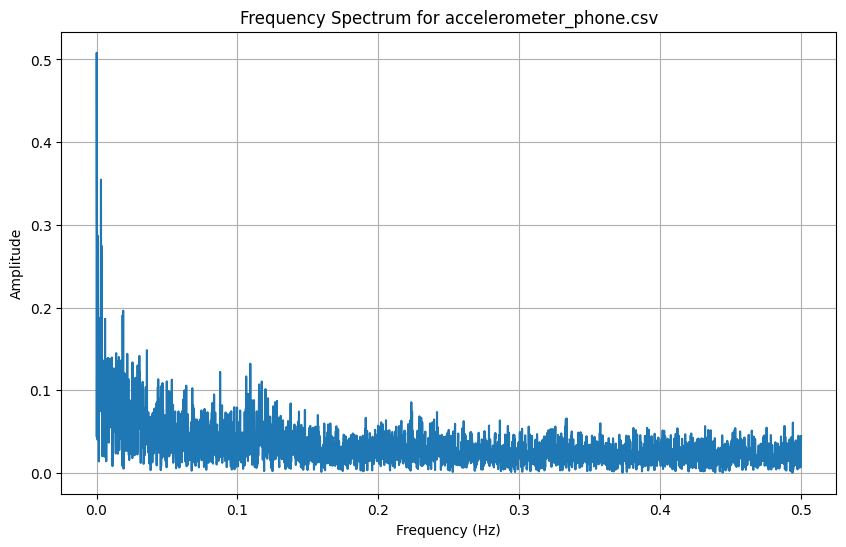

Optimal cutoff frequency for linear_acceleration_phone.csv: 0.47291473535472006 Hz


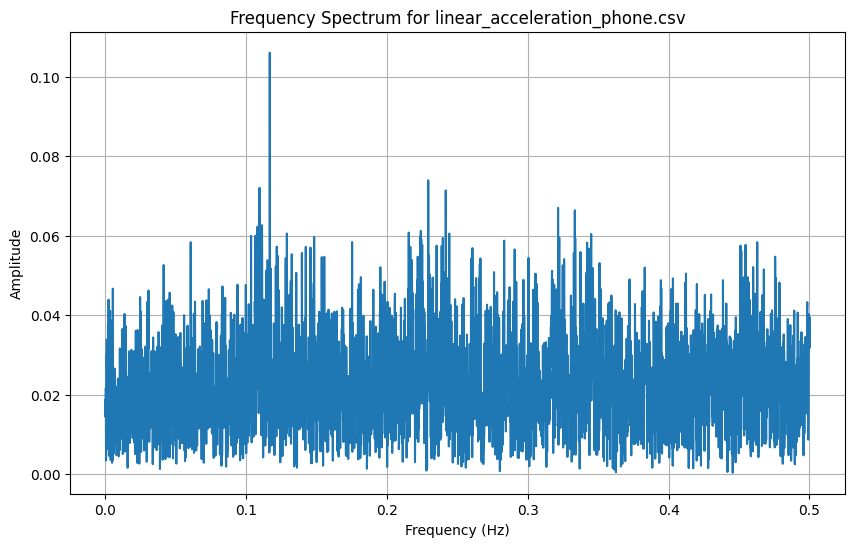

Optimal cutoff frequency for magnetometer_phone.csv: 0.12012946653705107 Hz


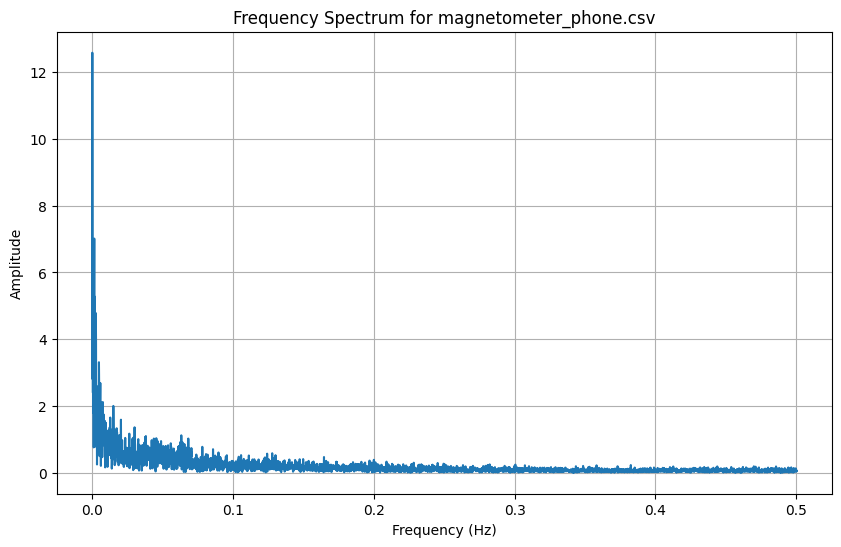

In [3]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# List of CSV files
files = ['accelerometer_phone.csv', 'linear_acceleration_phone.csv', 'magnetometer_phone.csv']

def compute_optimal_cutoff(yf, xf, energy_fraction=0.95):
    """
    Compute the optimal cutoff frequency based on the Fourier Transform of the signal.
    The optimal cutoff frequency is the frequency at which a certain fraction of the signal's energy is concentrated.
    """
    # Compute the cumulative sum of the spectrum's energy, normalized by the total energy
    energy_spectrum = np.abs(yf)**2
    cumulative_energy = np.cumsum(energy_spectrum)
    cumulative_energy /= cumulative_energy[-1]

    # Find the cutoff frequency
    cutoff_index = np.searchsorted(cumulative_energy, energy_fraction)
    optimal_cutoff = np.abs(xf[cutoff_index])

    return optimal_cutoff

for file in files:
    # Load the data
    df = pd.read_csv('./datasets/group47/dataset/' + file)

    # Select one of the axes (e.g., 'x') - adjust as needed
    signal = df['x']

    # Number of sample points
    N = signal.size
    # Sample spacing (assuming your timestamps are in nanoseconds and you want your frequency in Hz)
    T = 1.0 / (df['timestamps'].diff().mean() * 1e-9)

    signal = np.copy(signal)

    # Compute the Fast Fourier Transform (FFT)
    yf = fft(signal)
    xf = fftfreq(N, T)[:N//2]

    # Compute the optimal cutoff frequency
    optimal_cutoff = compute_optimal_cutoff(yf[0:N//2], xf)

    # Print the optimal cutoff frequency
    print(f'Optimal cutoff frequency for {file}: {optimal_cutoff} Hz')

    # Plot the FFT
    plt.figure(figsize=(10, 6))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    plt.title(f'Frequency Spectrum for {file}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

In [13]:
import datetime
import csv

# Your data
data = [
    ("Cycle", 22),
    ("minor stairs down", 1),
    ("Walk", 1),
    ("minor stairs up", 1),
    ("walking", 1),
    ("minor stairs", 1),
    ("Walking and standing", 1),
    ("Sitting (lecture)", 51),
    ("walking + minor stairs up", 1),
    ("multiple stairs", 2),
    ("Sitting (lecture)", 58),
    ("walking (app doesn't record when on the phone so a break of the data)", 15),
    ("6 floors stairs", 2),
    ("walking", 1),
    ("Sitting", 22),
    ("stairs down 6 floors", 2),
    ("walking", 3),
    ("2 floors stairs up and down consecutively", 1),
    ("walking", 1),
    ("minor stairs down", 1),
    ("looking for bike in circles", 3),
    ("minor stairs up", 1),
    ("cycling", 5),
    ("walking + standing", 2),
    ("sitting", 7),
    ("walking", 1),
    ("cycling", 21),
    ("2 floors stairs up and down", 1),
    ("walking", 16),
    ("stairs up 2 floors", 1),
]

# Define categories
categories = {
    "Walking": ["Walk", "walking", "Walking and standing", "walking + minor stairs up", "walking (app doesn't record when on the phone so a break of the data)", "walking + standing"],
    "Stairs": ["minor stairs down", "minor stairs up", "minor stairs", "multiple stairs", "6 floors stairs", "stairs down 6 floors", "2 floors stairs up and down consecutively", "2 floors stairs up and down", "stairs up 2 floors"],
    "Cycling": ["Cycle", "cycling"],
    "Sitting": ["Sitting (lecture)", "Sitting"],
    "Other": ["looking for bike in circles"]
}

# Function to categorize activities
def categorize_activity(activity):
    for category, activities in categories.items():
        if activity in activities:
            return category
    return "Other"

# Categorize data
categorized_data = [(categorize_activity(activity), duration) for activity, duration in data]

# Total seconds
total_seconds = 7241

# Calculate total minutes
total_minutes = sum([minutes for activity, minutes in categorized_data])

# Calculate the ratio of seconds per minute
seconds_per_minute = total_seconds / total_minutes


# Create a list of dictionaries
data_dicts = []
start_time = 0  # Start time in nanoseconds
for activity, minutes in categorized_data:
    duration_nanoseconds = int(minutes * seconds_per_minute * 1e9)  # Convert minutes to nanoseconds
    end_time = start_time + duration_nanoseconds
    data_dicts.append({
        "sensor_type": "interval_label",
        "device_type": "smartphone",
        "label": activity,
        "label_start": start_time,
        "label_start_datetime": (datetime.datetime(2016, 2, 8, 10, 28, 52) + datetime.timedelta(seconds=start_time/1e9)).strftime("%d/%m/%Y %H:%M:%S"),
        "label_end": end_time,
        "label_end_datetime": (datetime.datetime(2016, 2, 8, 10, 28, 52) + datetime.timedelta(seconds=end_time/1e9)).strftime("%d/%m/%Y %H:%M:%S"),
    })
    start_time = end_time



In [14]:
# Field names
fields = ["sensor_type", "device_type", "label", "label_start", "label_start_datetime", "label_end", "label_end_datetime"]

# Name of CSV file  
filename = "./datasets/group47/dataset/labels.csv"

# Writing to CSV file
with open(filename, 'w') as csvfile:  
    # Creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames = fields)  
      
    # Writing headers (field names)
    writer.writeheader()  
      
    # Writing data rows
    writer.writerows(data_dicts)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

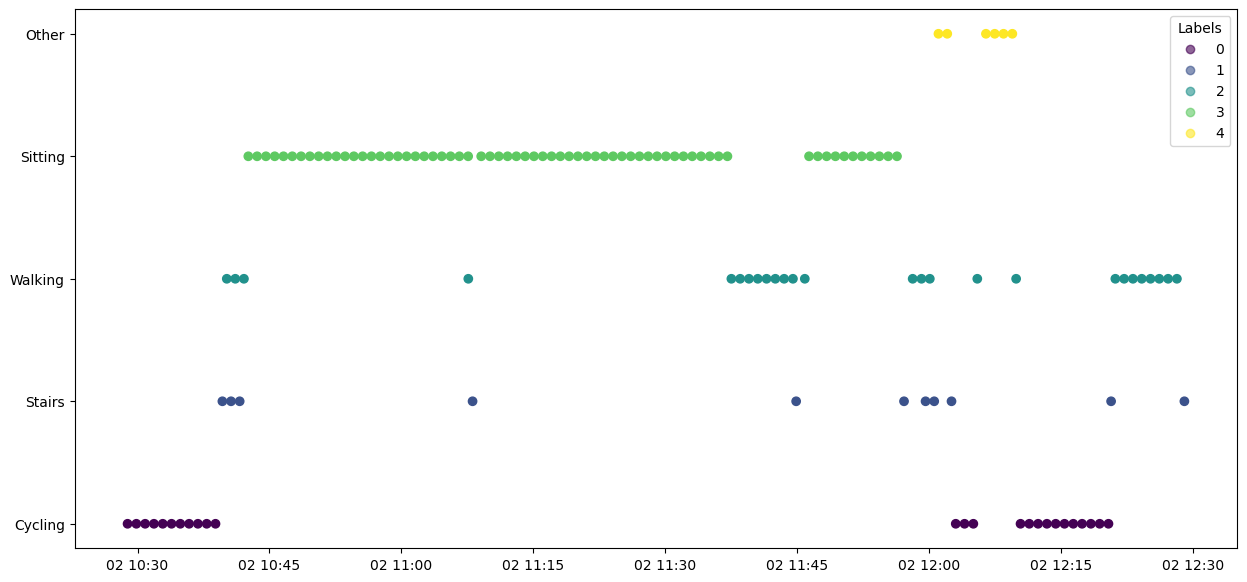

In [12]:
# Load the data for labels  
df = pd.read_csv('datasets/group47/dataset/labels.csv')

# Convert the timestamps to datetime
df['label_start_datetime'] = pd.to_datetime(df['label_start_datetime'])
df['label_end_datetime'] = pd.to_datetime(df['label_end_datetime'])

# Create a new dataframe for plotting
plot_df = pd.DataFrame(columns=['time', 'label'])

# Loop over the rows and create a new row for each minute within the start and end times
for idx, row in df.iterrows():
    time_range = pd.date_range(start=row['label_start_datetime'], end=row['label_end_datetime'], freq='T')
    temp_df = pd.DataFrame({'time': time_range, 'label': row['label']})
    plot_df = pd.concat([plot_df, temp_df])

# Plot the data
fig, ax = plt.subplots(figsize=(15, 7))

# Create a color dictionary for each unique label
colors = {label: idx for idx, label in enumerate(plot_df['label'].unique())}

# Scatter plot with colors based on the label
scatter = ax.scatter(plot_df['time'], plot_df['label'], c=plot_df['label'].map(colors))

# Create a legend
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Labels")

plt.show()